In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
# positive samples
X0 = [0, 1, 1, 0.5 , 2.1, 0, 1.3]
Y0 = [0, 1, 0.5, 1, 0.1, 2, 1.2]
# negative samples
X1 = [3, 3, 4, 1, 4, 2, 0, 3]
Y1 = [3, 4, 4, 4, 1, 3, 3.5, 0.7]

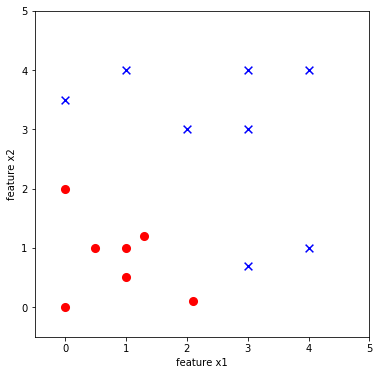

In [3]:
plt.figure(figsize = (6, 6))
plt.xlim((-0.5, 5));plt.ylim((-0.5, 5))
plt.xlabel('feature x1');plt.ylabel('feature x2')
plt.scatter(X0, Y0, s=50, marker='o', c='r', linewidths=2)
plt.scatter(X1, Y1, s=60, marker='x', c='b', linewidths=2)
plt.show()

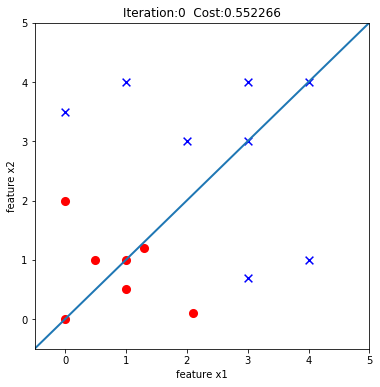

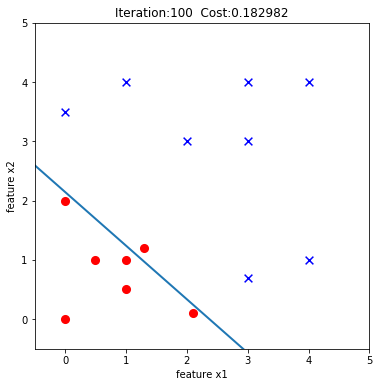

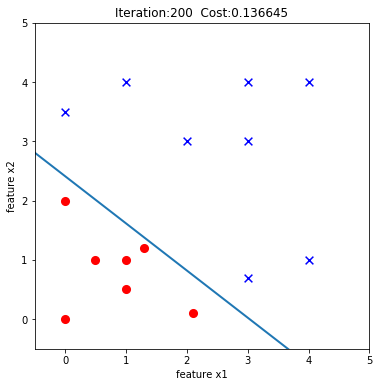

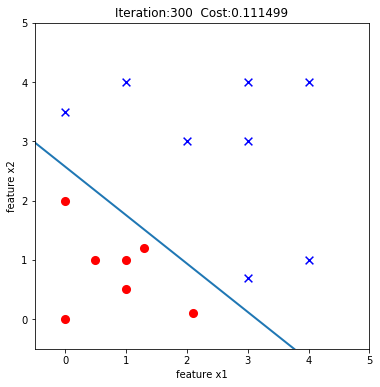

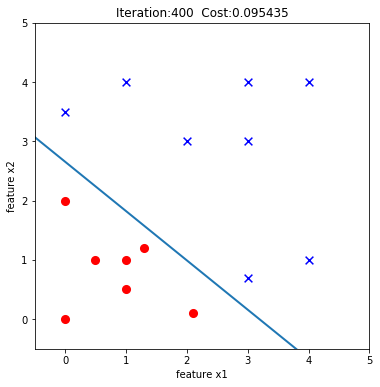

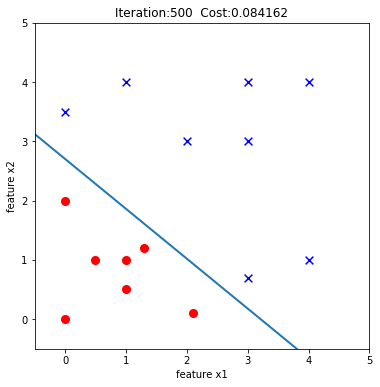

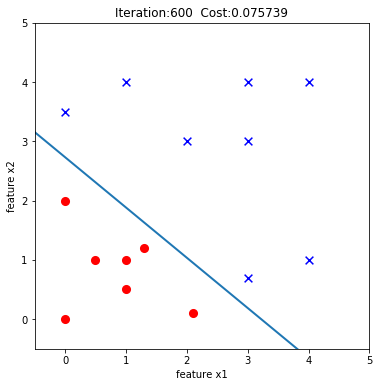

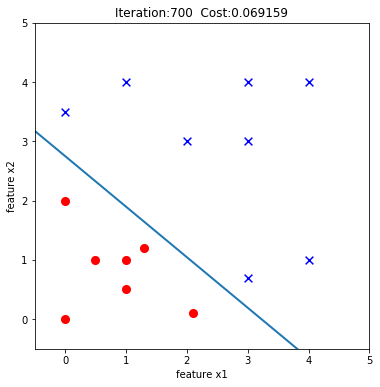

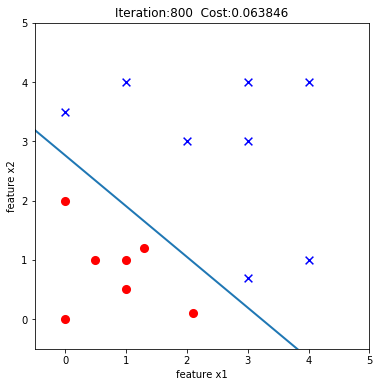

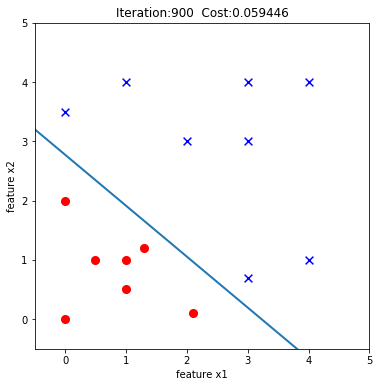

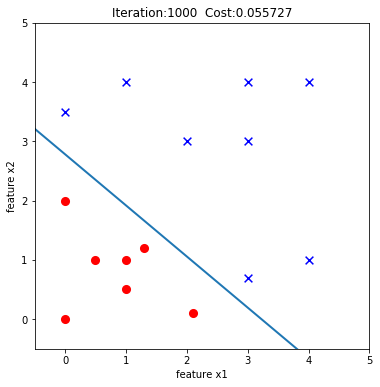

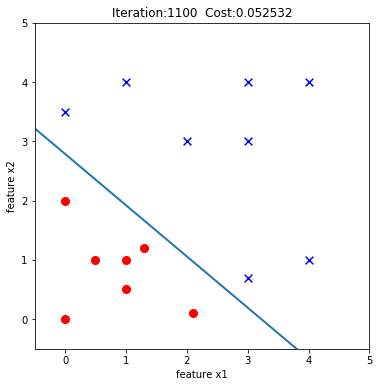

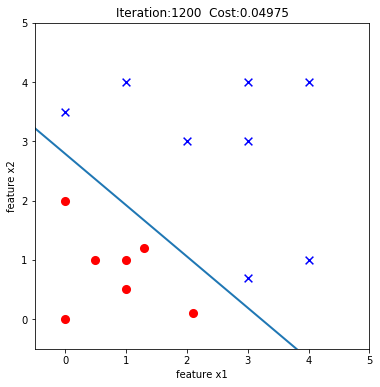

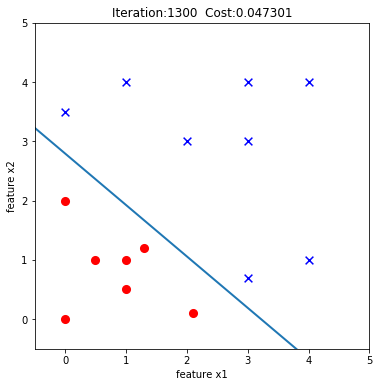

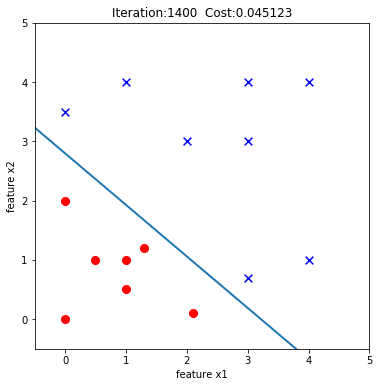

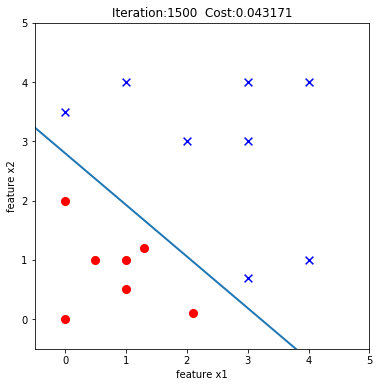

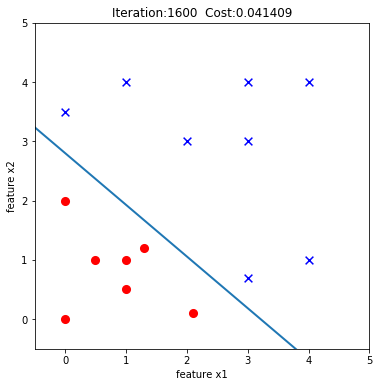

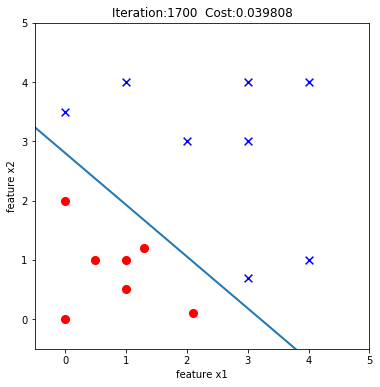

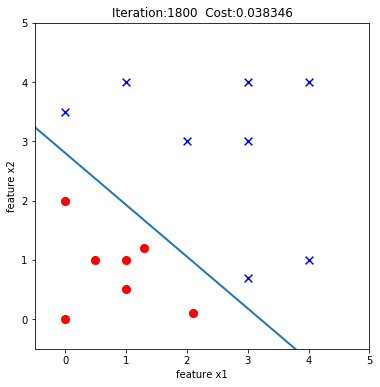

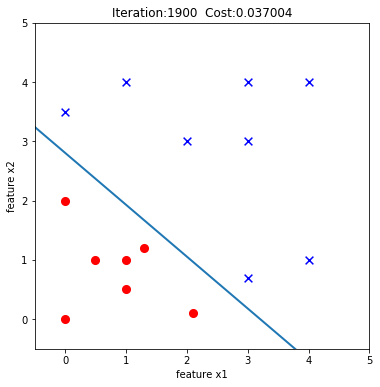

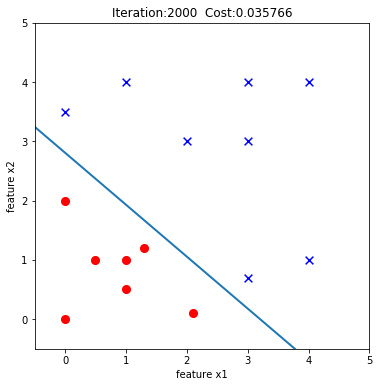

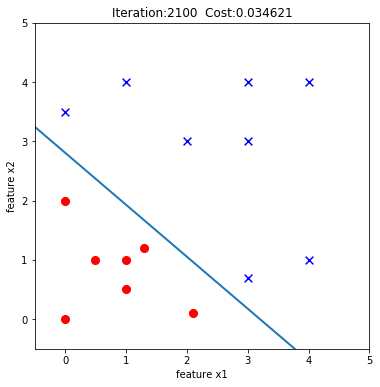

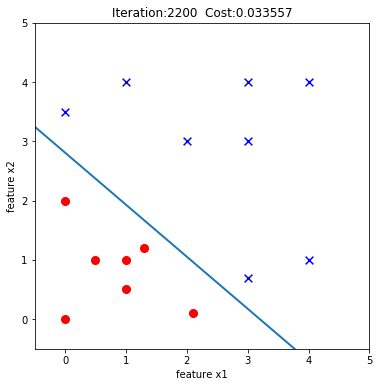

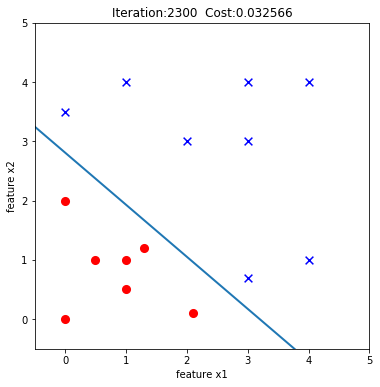

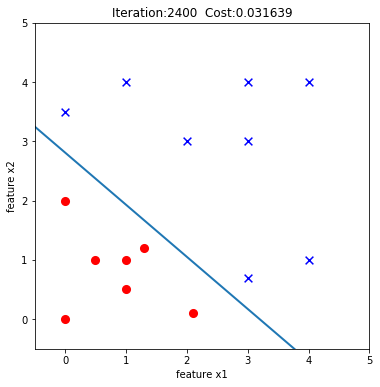

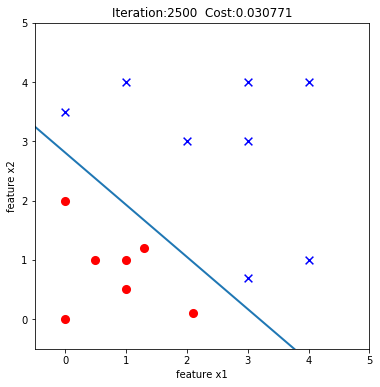

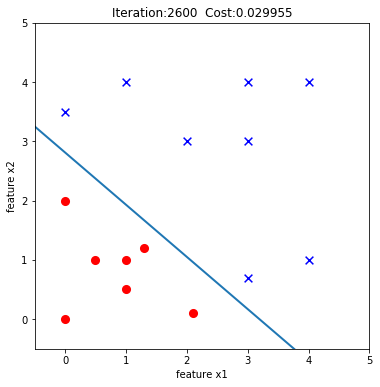

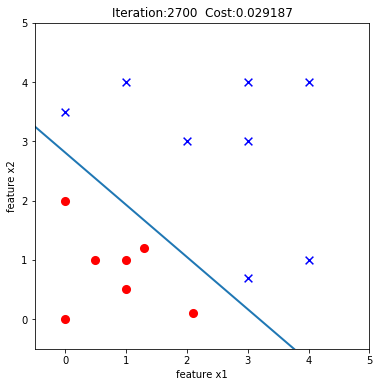

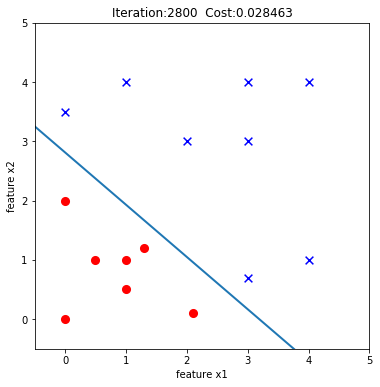

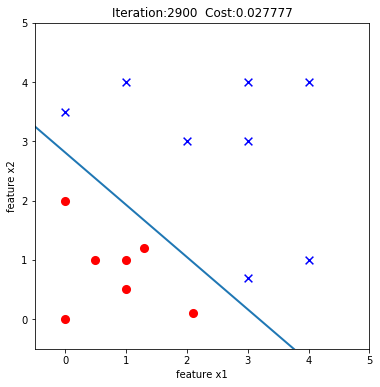

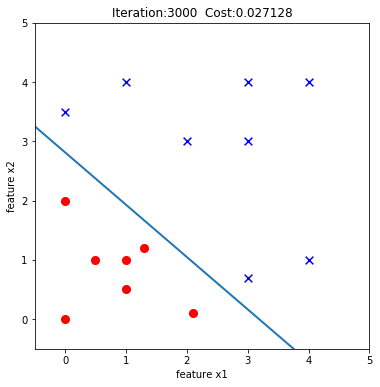

In [4]:
theta0, theta1, theta2 = 0, -1, 1
alpha = 0.1

for iteration in range(0, 3001):
    J, dtheta0, dtheta1, dtheta2 = 0, 0, 0, 0
    for i in range(len(X0)):
        J = J - math.log(1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i])))
        dtheta0 += 1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]))-1
        dtheta1 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]))-1)*X0[i]
        dtheta2 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]))-1)*Y0[i]
    for i in range(len(X1)):
        J = J - math.log(1 - 1/(1+math.e**(-theta0-theta1*X1[i]-theta2 * Y1[i])))
        dtheta0 += 1/(1+math.e**(-theta0-theta1*X1[i]-theta2 * Y1[i]))
        dtheta1 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2 * Y1[i])))*X1[i]
        dtheta2 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2 * Y1[i])))*Y1[i]
        
    J /= (2 * (len(X0) + len(X1)))
    dtheta0 /= (len(X0) + len(X1))
    dtheta1 /= (len(X0) + len(X1))
    dtheta2 /= (len(X0) + len(X1))
    
    if iteration % 100 == 0:
        x1, x2 = -1, 5
        y1 = -(theta0 + theta1 * x1) / (theta2 + 0.00000001)
        y2 = -(theta0 + theta1 * x2) / (theta2 + 0.00000001)
        plt.figure(figsize = (6, 6))
        plt.xlim((-0.5, 5));plt.ylim((-0.5, 5))
        plt.xlabel('feature x1');plt.ylabel('feature x2')
        plt.scatter(X0, Y0, s=50, marker='o', c='r', linewidths=2)
        plt.scatter(X1, Y1, s=60, marker='x', c='b', linewidths=2)
        plt.plot([x1, x2], [y1, y2], linewidth=2)
        plt.title('Iteration:' + '%s' % iteration + '  Cost:' + '%s'% round(J, 6))
        plt.show() 
    
    theta0 -= alpha * dtheta0
    theta1 -= alpha * dtheta1
    theta2 -= alpha * dtheta2

In [5]:
[theta0, theta1, theta2]

[8.261488625294517, -2.5912211829655316, -2.9365413273994285]